<a href="https://colab.research.google.com/github/sydstewart/Orders/blob/main/Orders_in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[96, 15, 17, 40, 30, 30, 96, 65, 13, 24, 54, 88, 49, 65, 73, 17, 12, 50, 90, 41, 31, 54, 92, 39, 35, 13, 28, 97, 86, 48, 72, 38, 83, 49, 72, 38, 41, 66, 60, 11, 4, 88, 37, 44, 73, 80, 20, 43, 74, 12, 31, 73, 98, 21, 22, 61, 89, 43, 7, 31, 74, 97, 16, 27, 57, 100, 70, 87, 39, 80, 47, 99, 79, 48, 61, 49, 77, 19, 56, 2, 12, 54, 60, 8, 42, 26, 83, 79, 3, 87, 73, 53, 65, 51, 12, 48, 45, 51, 67, 72, 49, 95, 63, 90, 72, 69, 47, 80, 52, 30, 96, 92, 44, 71, 51, 45, 86, 72, 67, 48, 46, 26, 93, 93, 88, 45, 82, 28, 85, 18, 50, 66, 91, 61, 78, 59, 47, 25, 71, 24, 52, 33, 45, 18, 26, 95, 38, 95, 65, 78, 13, 77, 63, 21, 73, 73, 44, 44, 99, 38, 11, 60, 77, 50, 2, 51, 17, 67, 38, 53, 16, 13, 13, 99, 81, 12, 60, 52, 72, 10, 51, 36, 1, 5, 22, 95, 10, 17, 59, 80, 44, 61, 70, 72, 50, 91, 6, 3, 77, 99, 20, 28, 30, 97, 77, 60, 26, 89, 52, 94, 84, 62, 79, 89, 53, 63, 3, 70, 16, 19, 62, 85, 7, 83, 91, 21, 100, 90, 9, 30, 84, 13, 70, 62, 79, 14, 33, 34, 4, 96, 29, 22, 87, 48, 77, 57, 65, 99, 78, 45, 21, 32, 8, 

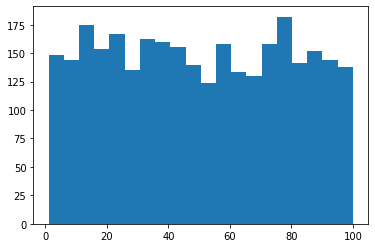

[0.10080164 0.52474321]
order  value for 20 = 12.689514341086863
order  value for 50 = 261.07956562406866
order  value for 70 = 1960.3102097857638
order  value for 80 = 5371.564092547787
order  value for 90 = 14718.946346508092
order  value for 95 = 24364.903873500753


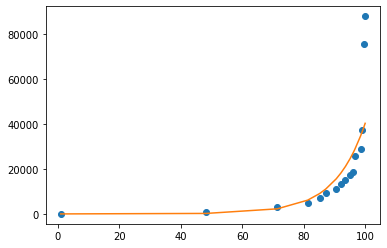

In [8]:

!pip install simpy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random

histdata =[]
for x in range(3000):
  randnum =  random.randint(1,100) 
  # print (randnum)
  histdata.append(randnum) 

print(histdata)
num_bins = 20 # <- number of bins for the histogram
plt.hist(histdata, num_bins)
plt.show()

y_data = np.array([1, 918,3067 ,5057 ,7050,9336 ,11134 ,13325,15267 ,17165 ,18859 ,25890,29095 ,37410,75825,88000])
x_data = np.array([1, 48.3,71.4,81.3,85.2,87.2,90.6,92.1,93.6,95.1,96.1,96.6,98.5,99.0,99.5,100.0])

log_x_data = np.log(x_data),
log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
# 0.10080164 0.52474321]
y = np.exp(0.52474321) * np.exp(0.10080164*x_data)
plt.plot(x_data, y_data, "o")
plt.plot(x_data, y)

y = np.exp(0.52474321) * np.exp(0.10080164*20)
print('order  value for 20 =', y )
y = np.exp(0.52474321) * np.exp(0.10080164*50)
print('order  value for 50 =', y )
y = np.exp(0.52474321) * np.exp(0.10080164*70)
print('order  value for 70 =', y )
y = np.exp(0.52474321) * np.exp(0.10080164*80)
print('order  value for 80 =', y )
y = np.exp(0.52474321) * np.exp(0.10080164*90)
print('order  value for 90 =', y )
y = np.exp(0.52474321) * np.exp(0.10080164*95)
print('order  value for 95 =', y )

def car(env):
     park_dur = []
     while True:
       #  print('Start parking at %d' % env.now)
         parking_duration = (np.random.exponential(10, 1)) 
        #  parking_duration = int(parking_duration)
         print('parking duration=', parking_duration *1000)
        #  park_dur.append = env.timeout(parking_duration)
         yield env.timeout(parking_duration)
        #  plt.hist(parking_duration)
        #  plt.show() 
      #   print('Start driving at %d' % env.now)
         trip_duration = 2
         yield env.timeout(trip_duration)
          

In [ ]:
# !pip install simpy
import simpy
park_dur = []
env = simpy.Environment()
env.process(car(env))
 
env.run(until=595)
# park_dur = car(env)

# print(park_dur)

parking duration= [16705.75203098]
parking duration= [34488.21358346]
parking duration= [2403.32890667]
parking duration= [40802.33310075]
parking duration= [10605.62873486]
parking duration= [3329.43919163]
parking duration= [5548.83179826]
parking duration= [20930.94548034]
parking duration= [15556.79476125]
parking duration= [343.72879246]
parking duration= [2378.6165246]
parking duration= [399.78210686]
parking duration= [489.55708104]
parking duration= [2758.60516182]
parking duration= [9045.45328435]
parking duration= [11401.4295965]
parking duration= [5309.89714572]
parking duration= [3720.97430094]
parking duration= [11638.38569328]
parking duration= [11704.22013451]
parking duration= [11054.22855101]
parking duration= [2066.55116006]
parking duration= [4293.79401873]
parking duration= [44052.62400121]
parking duration= [6168.25931417]
parking duration= [2580.35878755]
parking duration= [13430.56937109]
parking duration= [5745.43996377]
parking duration= [13626.55431671]
parkin